In [ ]:
# Questions
# 1. Markdown-- formulae!
# 1. How to know if weekdays are labled as Mon-Sun, not Sun to Mon. Wanna change?

## HW3_zz1598
## Assignment 2
#### Group: Dongjie Fan, Ziman zhou

### Approach Outline:
1. Question
2. Hypothesis: set H0,H1 and Significant Level $\alpha$
3. Data Wrangling
4. Plots
5. (to be continued...)

### 1.Question
Young people are more often to use citi bikes for commuting on weekends than that of middle-age people. 

Defined Notes: 
Young: 18 <= age < 40 
Middle-age: 40 <= age <= 60 

weekends: Saturday and Sunday 
week days: All days of a week

### 2.Hypoythesis
#### NULL HYPOTHESIS: H0
The ratio of the number of young people biking on weekends to those biking on week days(7 days) is the same or lower than the ratio of the number older people biking on weekekdns to those biking on week days.

$$H_{0}:  \frac{\# \,of\,YOUNG\, on\, weekends}{\#\,of\,YOUNG\, on \,week \,days};= \frac{\# \,of\,MIDDLE\,AGE\, on\, weekends}{\#\,of\,MIDDLE\,AGE\, on \,week \,days}$$

#### ALTERNATIVE HYPOTHESIS: H1
The ratio of the number of young people biking on weekends to those biking on week days(7 days) is the higher than the ratio of the number older people biking on weekekdns to those biking on week days.

$$H_{1}:  \frac{\# \,of\,YOUNG\, on\, weekends}{\#\,of\,YOUNG\, on \,week \,days}; \frac{\# \,of\,MIDDLE\,AGE\, on\, weekends}{\#\,of\,MIDDLE\,AGE\, on \,week \,days}$$
Significant Level: $\alpha=0.05$



#### Confidence Interval: 95%  (significance level a=0.05)


In [2]:
from __future__  import print_function, division
import pylab as pl
#import seaborn
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

print (os.environ['PUIDATA'])  #print the path of desired directory PUIDATA

Populating the interactive namespace from numpy and matplotlib
/home/cusp/zz1598/PUIdata


In [3]:
#s I need to make a new directory
if not os.path.isdir(os.environ['PUIDATA']):
    os.system('mkdir ' + os.environ['PUIDATA'])

In [4]:
def getCitiBikeCSV(datestring):
    print("Try downloading...", datestring)

    #check if it is in the folder already
    if not os.path.isfile(os.getenv('PUIDATA') + "/" + datestring + '-citibike-tripdata.csv'):
        if not os.path.isfile(os.getenv('PUIDATA') + '/' + datestring + '-citibike-tripdata.zip'):
            #if not exists, then download the zip file from website
            os.system('curl -O https://s3.amazonaws.com/tripdata/'+ datestring + "-citibike-tripdata.zip")
        # Move the file into PUIDATA directory
        os.system('mv ' + datestring + '-citibike-tripdata.zip ' + os.getenv('PUIDATA'))
        #unzip the file, and move from current dir to PUIDATA
        os.system('unzip ' + os.getenv('PUIDATA') + '/' + datestring + '-citibike-tripdata.zip')
        os.system('mv ' + datestring + '-citibike-tripdata.csv ' + os.getenv('PUIDATA'))
    
    if 201307 <= int(datestring) < 201409:
        os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
        os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    elif int(datestring) < 201307:
        print ('No data earlier than 201307')
        
    print ("file in place, you can continue")

In [7]:
datestring = raw_input("Enter datestring(i.e.201308): ")
getCitiBikeCSV(datestring)
# We use 201512 data

Enter datestring(i.e.201308): 201502
Try downloading... 201502
file in place, you can continue


In [9]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1
5,717,2/1/2015 0:02,2/1/2015 0:14,373,Willoughby Ave & Walworth St,40.693317,-73.953820,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,15854,Subscriber,1979.0,1
6,1306,2/1/2015 0:04,2/1/2015 0:26,352,W 56 St & 6 Ave,40.763406,-73.977225,504,1 Ave & E 15 St,40.732219,-73.981656,15173,Subscriber,1983.0,1
7,913,2/1/2015 0:04,2/1/2015 0:19,439,E 4 St & 2 Ave,40.726281,-73.989780,116,W 17 St & 8 Ave,40.741776,-74.001497,17862,Subscriber,1955.0,1
8,759,2/1/2015 0:04,2/1/2015 0:17,335,Washington Pl & Broadway,40.729039,-73.994046,2012,E 27 St & 1 Ave,40.739445,-73.976806,21183,Subscriber,1985.0,2
9,585,2/1/2015 0:05,2/1/2015 0:15,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,444,Broadway & W 24 St,40.742354,-73.989151,14843,Subscriber,1982.0,1


In [10]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [11]:
df.drop([u'tripduration', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'gender'],axis=1, inplace=True)
df.head(10)

,starttime,birth year
0,2/1/2015 0:00,1978.0
1,2/1/2015 0:00,1993.0
2,2/1/2015 0:01,1969.0
3,2/1/2015 0:01,1985.0
4,2/1/2015 0:01,1957.0
5,2/1/2015 0:02,1979.0
6,2/1/2015 0:04,1983.0
7,2/1/2015 0:04,1955.0
8,2/1/2015 0:04,1985.0
9,2/1/2015 0:05,1982.0


In [12]:
df['date'] = pd.to_datetime(df['starttime'])
df.head(10)

,starttime,birth year,date
0,2/1/2015 0:00,1978.0,2015-02-01 00:00:00
1,2/1/2015 0:00,1993.0,2015-02-01 00:00:00
2,2/1/2015 0:01,1969.0,2015-02-01 00:01:00
3,2/1/2015 0:01,1985.0,2015-02-01 00:01:00
4,2/1/2015 0:01,1957.0,2015-02-01 00:01:00
5,2/1/2015 0:02,1979.0,2015-02-01 00:02:00
6,2/1/2015 0:04,1983.0,2015-02-01 00:04:00
7,2/1/2015 0:04,1955.0,2015-02-01 00:04:00
8,2/1/2015 0:04,1985.0,2015-02-01 00:04:00
9,2/1/2015 0:05,1982.0,2015-02-01 00:05:00


In [13]:
df.loc[:,'age'] = 2016 - df['birth year'] + 1
df['age_group'] = df.age < 40
df['age_group'] = df.age_group * 1
df.head(10)

,starttime,birth year,date,age,age_group
0,2/1/2015 0:00,1978.0,2015-02-01 00:00:00,39.0,1
1,2/1/2015 0:00,1993.0,2015-02-01 00:00:00,24.0,1
2,2/1/2015 0:01,1969.0,2015-02-01 00:01:00,48.0,0
3,2/1/2015 0:01,1985.0,2015-02-01 00:01:00,32.0,1
4,2/1/2015 0:01,1957.0,2015-02-01 00:01:00,60.0,0
5,2/1/2015 0:02,1979.0,2015-02-01 00:02:00,38.0,1
6,2/1/2015 0:04,1983.0,2015-02-01 00:04:00,34.0,1
7,2/1/2015 0:04,1955.0,2015-02-01 00:04:00,62.0,0
8,2/1/2015 0:04,1985.0,2015-02-01 00:04:00,32.0,1
9,2/1/2015 0:05,1982.0,2015-02-01 00:05:00,35.0,1


In [14]:
#drop rows with age > 60
df = df.drop(df[df.age > 60].index)
df.head(10)

,starttime,birth year,date,age,age_group
0,2/1/2015 0:00,1978.0,2015-02-01 00:00:00,39.0,1
1,2/1/2015 0:00,1993.0,2015-02-01 00:00:00,24.0,1
2,2/1/2015 0:01,1969.0,2015-02-01 00:01:00,48.0,0
3,2/1/2015 0:01,1985.0,2015-02-01 00:01:00,32.0,1
4,2/1/2015 0:01,1957.0,2015-02-01 00:01:00,60.0,0
5,2/1/2015 0:02,1979.0,2015-02-01 00:02:00,38.0,1
6,2/1/2015 0:04,1983.0,2015-02-01 00:04:00,34.0,1
8,2/1/2015 0:04,1985.0,2015-02-01 00:04:00,32.0,1
9,2/1/2015 0:05,1982.0,2015-02-01 00:05:00,35.0,1
10,2/1/2015 0:05,1988.0,2015-02-01 00:05:00,29.0,1


In [15]:
df = df.iloc[:,(2,4)]

In [16]:
df.head(10)

,date,age_group
0,2015-02-01 00:00:00,1
1,2015-02-01 00:00:00,1
2,2015-02-01 00:01:00,0
3,2015-02-01 00:01:00,1
4,2015-02-01 00:01:00,0
5,2015-02-01 00:02:00,1
6,2015-02-01 00:04:00,1
8,2015-02-01 00:04:00,1
9,2015-02-01 00:05:00,1
10,2015-02-01 00:05:00,1


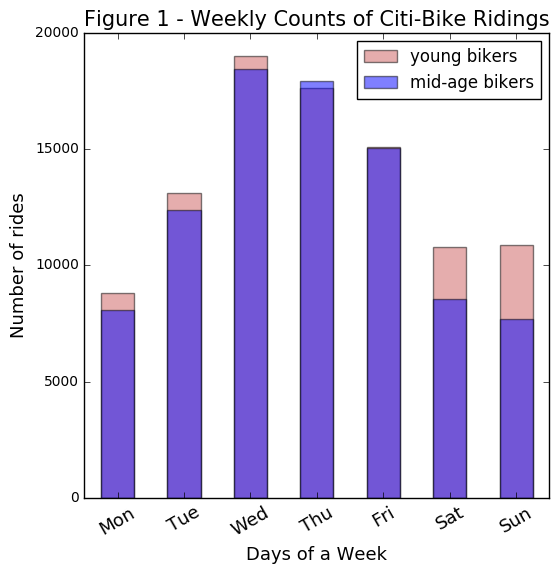

In [17]:
fig=pl.figure(figsize(6,6))

# young people bike ridings on each days of a week
norm_yon = 1
count1 = (df['date'][df['age_group'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_yon
count1.plot(kind="bar", color='IndianRed', alpha=0.5, label='young bikers')

# count mid-age people bike ridings on each day of a week
norm_mid = 1
count0 = (df['date'][df['age_group'] == 0].groupby([df['date'].dt.weekday]).count()) / norm_mid
ax = count0.plot(kind="bar", alpha=0.5, label='mid-age bikers')

tmp = ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=13, rotation=30)
ax.set_title('Figure 1 - Weekly Counts of Citi-Bike Ridings', fontsize=15)
ax.set_xlabel('Days of a Week', fontsize=13)
ax.set_ylabel('Number of rides', fontsize=13)
pl.legend(loc='best', fontsize=12)

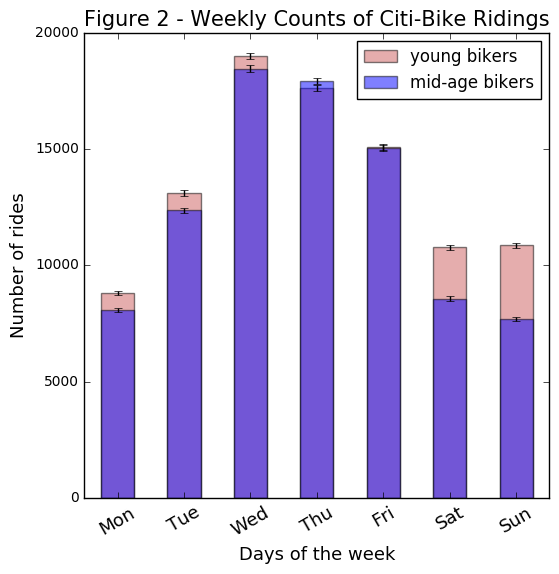

In [18]:
fig=pl.figure(figsize(6,6))

counts_y = df.date[df.age_group == 1].groupby([df.date.dt.weekday]).count()
norm_y = 1
error_y = np.sqrt(counts_y)
ax=((counts_y) / norm_y).plot(kind="bar",color='IndianRed', alpha=0.5, 
                              yerr=[((error_y) / norm_y, (error_y) / norm_y)], label='young bikers')


counts_m = df.date[df.age_group == 0 ].groupby([df.date.dt.weekday]).count()
norm_m = 1
error_m = np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], label='mid-age bikers')

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=13, rotation=30)
ax.set_title('Figure 2 - Weekly Counts of Citi-Bike Ridings', fontsize=15)
ax.set_ylabel ("Number of rides", fontsize=13)
ax.set_xlabel ("Days of the week", fontsize=13)
pl.legend(loc='best',fontsize=12)

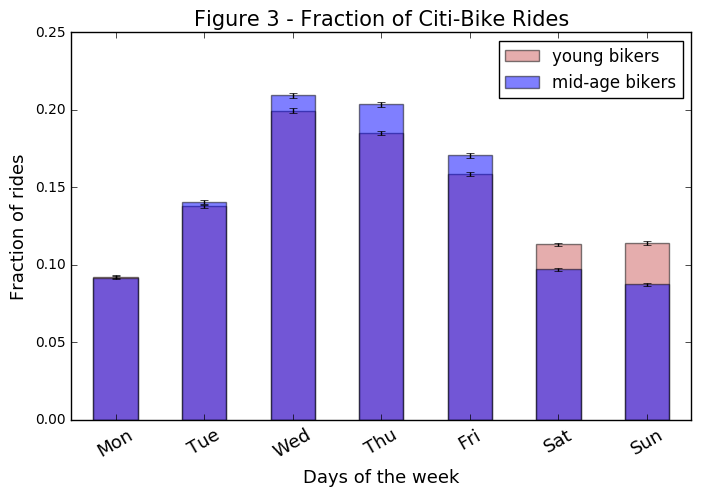

In [19]:
fig = pl.figure(figsize(8,5))

norm_y = counts_y.sum()
error_y = np.sqrt(counts_y)
((counts_y) / norm_y).plot(kind="bar", alpha=0.5, color='IndianRed', 
                           yerr=[((error_y) / norm_y, (error_y) / norm_y)], label='young bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m)/norm_m,(error_m)/norm_m)], label='mid-age bikers')

ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=13, rotation=30)
ax.set_title('Figure 3 - Fraction of Citi-Bike Rides', fontsize=15)
ax.set_ylabel ("Fraction of rides", fontsize=13)
ax.set_xlabel ("Days of the week", fontsize=13)
pl.legend(loc='best',fontsize=12)

#the rates of the mid-age group gets higher. Is it because its total sum of ridings is lower compared to the young group? 

Young: week:1.000, weekend:0.227, week error:0.003, weekend error:0.002
Mid-age: week:1.000, weekend:0.185, week error:0.003, weekend error:0.001


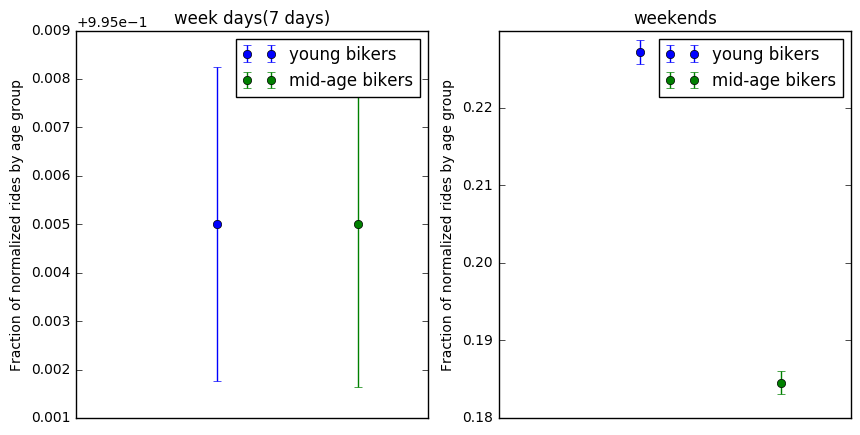

In [20]:
# Set up the test proportion

fig = pl.figure(figsize(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
week_y = sum(counts_y[:]) * 1.0 / norm_y
weekend_y = sum(counts_y[-2:]) * 1.0 / norm_y
eweek_y = np.sqrt(sum(error_y[:]**2)) / norm_y
eweekend_y = np.sqrt(sum(error_y[-2:]**2)) / norm_y

week_m = sum(counts_m[:]) * 1.0 / norm_m
weekend_m = sum(counts_m[-2:]) * 1.0 / norm_m
eweek_m = np.sqrt(sum(error_m[:]**2)) / norm_m
eweekend_m = np.sqrt(sum(error_m[-2:]**2)) / norm_m

print("Young: week:{0:.3f}, weekend:{1:.3f}, week error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_y, weekend_y, eweek_y, eweekend_y))
print("Mid-age: week:{0:.3f}, weekend:{1:.3f}, week error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_m, weekend_m, eweek_m, eweekend_m))

ax1.errorbar([0.2], [week_y], yerr=[eweek_y], fmt='o', label='young bikers')
ax1.errorbar([0.4], [week_m], yerr=[eweek_m], fmt='o', label='mid-age bikers')
ax1.set_xlim(0, 0.5)
#ax1.set_ylim(0,0.02)

ax2.errorbar([0.2], [weekend_y], yerr=[eweekend_y], fmt='o', label='young bikers')
ax2.errorbar([0.4], [weekend_m], yerr=[eweekend_m], fmt='o', label='mid-age bikers')
ax2.set_xlim(0, 0.5)


ax1.set_title("week days(7 days)")
ax1.set_ylabel("Fraction of normalized rides by age group")
ax1.legend(loc='best', fontsize = 12)
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by age group")
ax2.legend(loc='best',fontsize = 12)


In [48]:
counts_test_y = df.date[df.age_group == 1].groupby([df.date.dt.weekday]).count()
print (counts_test_y)

date
0     8795
1    13112
2    19010
3    17622
4    15095
5    10782
6    10868
Name: date, dtype: int64
